In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filepath = 'data/h2017collisionsfinal.xlsx'

In [3]:
df = pd.read_excel(filepath)

In [4]:
df.head()

,Record,Location,X,Y,Longitude,Latitude,Year,Date,Time,Environment,Road_Surface,Traffic_Control,Collision_Location,Light,Collision_Classification,Impact_type
0,1,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365431.70335,5.021829e+06,-75.726437,45.333794,2017,2017-08-22,18:10:00,01 - Clear,02 - Wet,01 - Traffic signal,02 - Intersection related,01 - Daylight,02 - Non-fatal injury,03 - Rear end
1,2,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365430.63705,5.021830e+06,-75.726451,45.333803,2017,2017-10-19,12:20:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,03 - P.D. only,05 - Turning movement
2,3,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365431.70110,5.021829e+06,-75.726437,45.333794,2017,2017-01-31,08:09:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,01 - Daylight,02 - Non-fatal injury,03 - Rear end
3,4,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365431.35217,5.021829e+06,-75.726442,45.333794,2017,2017-03-24,10:45:00,03 - Snow,03 - Loose snow,01 - Traffic signal,02 - Intersection related,01 - Daylight,03 - P.D. only,03 - Rear end
4,5,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365432.02107,5.021829e+06,-75.726433,45.333794,2017,2017-04-04,12:30:00,02 - Rain,02 - Wet,01 - Traffic signal,02 - Intersection related,01 - Daylight,03 - P.D. only,03 - Rear end


In [5]:
df.describe()

,Record,X,Y,Longitude,Latitude,Year
count,14394.000000,14394.000000,1.439400e+04,14394.000000,14394.000000,14394.0
mean,7197.500000,366974.040985,5.025853e+06,-75.706185,45.369796,2017.0
std,4155.334222,9598.292489,7.613155e+03,0.122977,0.068101,0.0
min,1.000000,317874.138160,4.981312e+06,-76.332944,44.969795,2017.0
25%,3599.250000,363081.656613,5.021840e+06,-75.756104,45.334180,2017.0
50%,7197.500000,367644.666650,5.026990e+06,-75.697177,45.379985,2017.0
75%,10795.750000,371920.938698,5.031281e+06,-75.642901,45.418448,2017.0
max,14394.000000,400270.545830,5.043414e+06,-75.280530,45.524708,2017.0


In [6]:
df.dtypes

Record                               int64
Location                            object
X                                  float64
Y                                  float64
Longitude                          float64
Latitude                           float64
Year                                 int64
Date                        datetime64[ns]
Time                                object
Environment                         object
Road_Surface                        object
Traffic_Control                     object
Collision_Location                  object
Light                               object
Collision_Classification            object
Impact_type                         object
dtype: object

In [7]:
accidents_dates_df = df[['Record','Date']]

In [8]:
accidents_by_month = df.groupby(df['Date'].dt.strftime('%m %B'))['Record'].count().sort_index()
accidents_by_month

Date
01 January      1275
02 February     1279
03 March        1224
04 April         913
05 May          1084
06 June         1095
07 July          971
08 August        990
09 September    1176
10 October      1139
11 November     1493
12 December     1755
Name: Record, dtype: int64

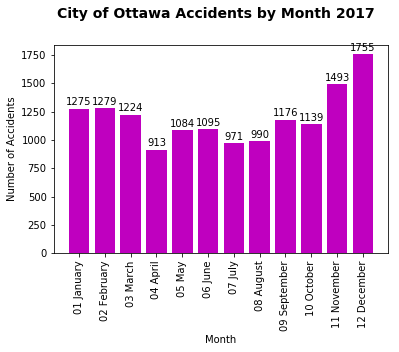

In [9]:
bar_width = 0.8

fig = plt.figure()
fig.suptitle('City of Ottawa Accidents by Month 2017', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

ax.set_xlabel('Month')
ax.set_ylabel('Number of Accidents')
plt.xticks(rotation=90)


bars = ax.bar(accidents_by_month.index, accidents_by_month, bar_width,
      color='m')

for bar in bars:
    height = bar.get_height()
    height_displacement = 15
    ax.text(bar.get_x() + bar.get_width()/2.0, height + height_displacement,
            '%d' % height,
            ha='center', va='bottom')

plt.show()

# Compare 2017 over 2016

In [10]:
filepath_2016 = 'data/2016collisionsfinal.xls'
df_2016 = pd.read_excel(filepath_2016)
df_2016.head()

,Record,Location,X,Y,Date,Time,Environment,Road_Surface,Traffic_Control,Collision_Location,Light,Collision_Classification,Impact_type
0,1,105 S OF COMMISSIONER ST @ ALBERT ST,366666.27470,5.030879e+06,2016-08-04,17:03:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,01 - Daylight,03 - P.D. only,04 - Sideswipe
1,2,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365431.43901,5.021830e+06,2016-03-30,15:44:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,02 - Non-fatal injury,05 - Turning movement
2,3,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365432.23417,5.021830e+06,2016-09-02,16:02:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,03 - P.D. only,05 - Turning movement
3,4,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365430.72652,5.021830e+06,2016-03-12,17:30:00,01 - Clear,01 - Dry,01 - Traffic signal,03 - At intersection,01 - Daylight,03 - P.D. only,05 - Turning movement
4,5,210 W OF MERIVALE RD @ WEST HUNT CLUB RD,365430.66577,5.021831e+06,2016-08-23,15:52:00,01 - Clear,01 - Dry,01 - Traffic signal,02 - Intersection related,01 - Daylight,03 - P.D. only,03 - Rear end


In [11]:
accidents_by_month_2016 = df_2016.groupby(df_2016['Date'].dt.strftime('%m %B'))['Record'].count().sort_index()
accidents_by_month_2016

Date
01 January      1407
02 February     1523
03 March        1018
04 April         944
05 May          1109
06 June         1135
07 July         1035
08 August        976
09 September    1073
10 October      1111
11 November     1155
12 December     1537
Name: Record, dtype: int64

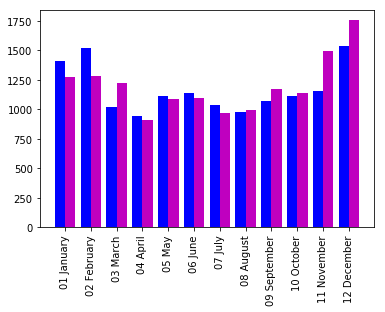

In [12]:
bar_width = 0.8

def subcategorybar(X, vals, width=bar_width):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        barcolor = 'b' if i==0 else 'm'
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", color=barcolor)   
    plt.xticks(_X, X)

plt.xticks(rotation=90)
subcategorybar(accidents_by_month.index, [accidents_by_month_2016, accidents_by_month])

plt.show()

In [13]:
year_over_year_changes = round((accidents_by_month - accidents_by_month_2016) / accidents_by_month_2016 * 100,2)

year_over_year = pd.Series(index = accidents_by_month.index, data = year_over_year_changes)
year_over_year

Date
01 January      -9.38
02 February    -16.02
03 March        20.24
04 April        -3.28
05 May          -2.25
06 June         -3.52
07 July         -6.18
08 August        1.43
09 September     9.60
10 October       2.52
11 November     29.26
12 December     14.18
Name: Record, dtype: float64

In [14]:
print("Average monthly y/y change: ", round(np.average(year_over_year.values),2),"%")

Average monthly y/y change:  3.05 %
